In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#sns.set_theme(style="dark",palette="PuRd_r")

In [3]:
df = pd.read_csv("data/data_subset.csv", index_col=0)

In [4]:
df["trip_duration"]=pd.to_datetime(df["ended_at"])-pd.to_datetime(df["started_at"])

In [5]:
df["minutes"]=(df["trip_duration"].dt.days*24*60)+(df["trip_duration"].dt.seconds/60)

In [6]:
df 

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,_merge,bike_rides_daily,trip_duration,minutes
0,AC76F5E4EFDCE317,electric_bike,2022-01-02 16:20:01,2022-01-02 16:22:34,Lexington Ave & E 111 St,7567.06,E 115 St & Madison Ave,7599.02,40.795412,-73.944123,40.798944,-73.944846,casual,2022-01-02,11.4,both,2,0 days 00:02:33,2.550000
1,E121DC402DB250F1,classic_bike,2022-01-02 14:28:05,2022-01-02 14:58:12,48 St & 5 Ave,3202.06,Bond St & Bergen St,4404.10,40.646351,-74.009271,40.684967,-73.986208,member,2022-01-02,11.4,both,2,0 days 00:30:07,30.116667
2,67E6F94A7B94F776,electric_bike,2022-01-03 20:11:00,2022-01-03 20:15:17,E 156 & Brook Ave,7896.11,E 161 St & Park Ave,7979.17,40.819823,-73.912411,40.824811,-73.916407,member,2022-01-03,1.4,both,1,0 days 00:04:17,4.283333
3,441B0C0506D400C2,classic_bike,2022-01-04 12:43:34,2022-01-04 12:46:59,E 33 St & 1 Ave,6197.08,E 39 St & 2 Ave,6345.08,40.743227,-73.974498,40.748033,-73.973828,casual,2022-01-04,-2.7,both,1,0 days 00:03:25,3.416667
4,99005ACE9002E034,electric_bike,2022-01-06 23:05:29,2022-01-06 23:12:23,W 37 St & 10 Ave,6611.02,W 52 St & 11 Ave,6926.01,40.756604,-73.997901,40.767272,-73.993929,member,2022-01-06,4.9,both,3,0 days 00:06:54,6.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1909EEBDB8561EF3,classic_bike,2022-12-25 16:51:22,2022-12-25 17:11:28,Sands St & Jay St,4821.03,Cliff St & Fulton St,5065.14,40.700119,-73.986200,40.708380,-74.004950,member,2022-12-25,-6.9,both,1,0 days 00:20:06,20.100000
996,835FC1877F5B64A2,classic_bike,2022-12-26 15:17:21,2022-12-26 15:37:04,Brooklyn Ave & Dean St,4131.03,Kingston Ave & Park Pl,4016.03,40.676786,-73.944239,40.673080,-73.941910,member,2022-12-26,-4.7,both,1,0 days 00:19:43,19.716667
997,4C5C1A46D62AA1BC,classic_bike,2022-12-30 12:44:40,2022-12-30 12:48:00,E 23 St & 1 Ave,5929.01,E 17 St & 2 Ave,5896.01,40.736502,-73.978095,40.734312,-73.983725,member,2022-12-30,9.3,both,2,0 days 00:03:20,3.333333
998,39BD3E36E8E24D86,classic_bike,2022-12-30 15:22:03,2022-12-30 15:27:33,46 St & 25 Ave,6907.03,Steinway St & Ditmars Blvd,7074.01,40.765992,-73.906829,40.772717,-73.906127,member,2022-12-30,9.3,both,2,0 days 00:05:30,5.500000


<Axes: xlabel='rideable_type'>

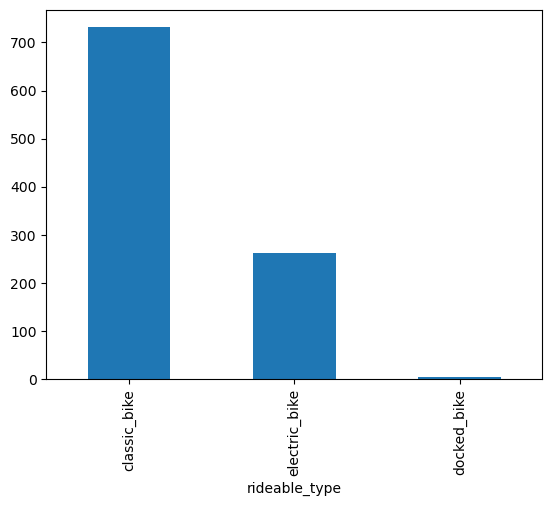

In [7]:
df['rideable_type'].value_counts().plot(kind = 'bar')

<Axes: xlabel='rideable_type', ylabel='count'>

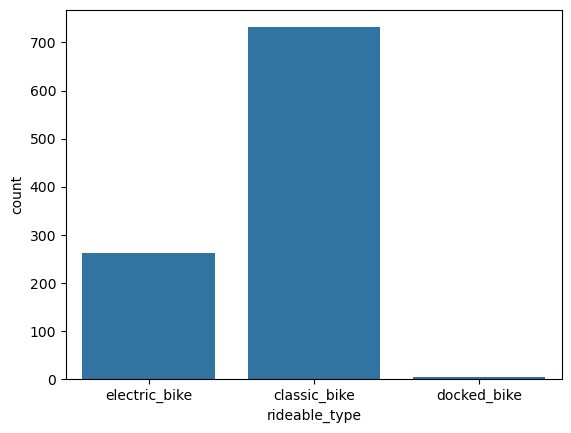

In [8]:
sns.countplot(data = df, x = 'rideable_type')

In [9]:
df['value'] = 1
df_t = df.groupby('end_station_name')['value'].count().reset_index()

In [10]:
top20 = df_t.nlargest(20, 'value')
top20

,end_station_name,value
528,W 31 St & 7 Ave,10
245,E 2 St & Avenue C,7
526,W 30 St & 10 Ave,7
19,12 Ave & W 40 St,6
124,Broadway & E 14 St,6
303,E 9 St & 5 Ave,6
472,Stanton St & Chrystie St,6
519,W 22 St & 8 Ave,6
543,W 44 St & 5 Ave,6
168,Central Park West & W 72 St,5


<Axes: xlabel='value', ylabel='end_station_name'>

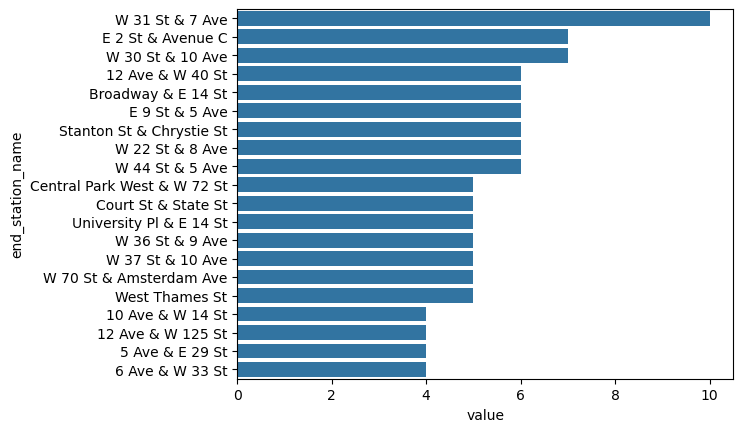

In [11]:
sns.barplot(data = top20, x = 'value', y = 'end_station_name')

C:\Users\maryp\AppData\Local\Temp\ipykernel_28432\2499621831.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top20, x = 'value', y = 'end_station_name', palette=("Blues"))


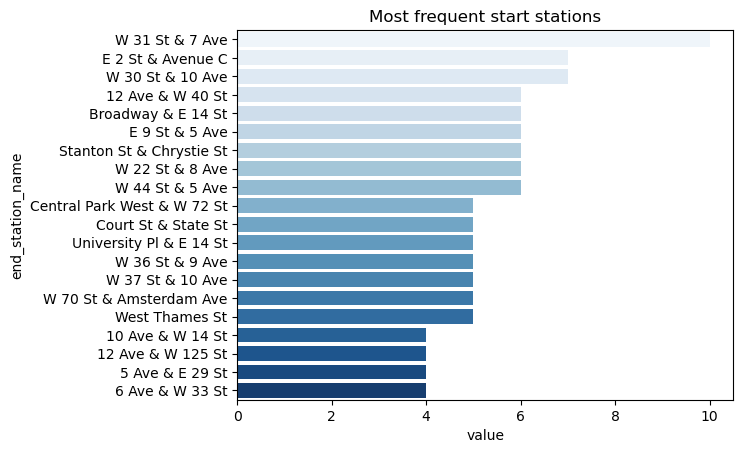

In [12]:
sns.barplot(data = top20, x = 'value', y = 'end_station_name', palette=("Blues")) 
plt.title("Most frequent start stations")
plt.show()

C:\Users\maryp\AppData\Local\Temp\ipykernel_28432\2420412360.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top20, x = 'value', y = 'end_station_name', palette=("Blues_r"))


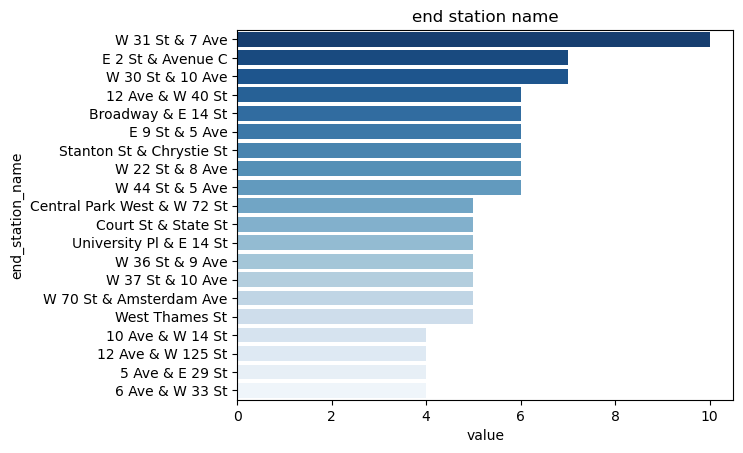

In [13]:
sns.barplot(data = top20, x = 'value', y = 'end_station_name', palette=("Blues_r"))
plt.title("end station name")
plt.show()


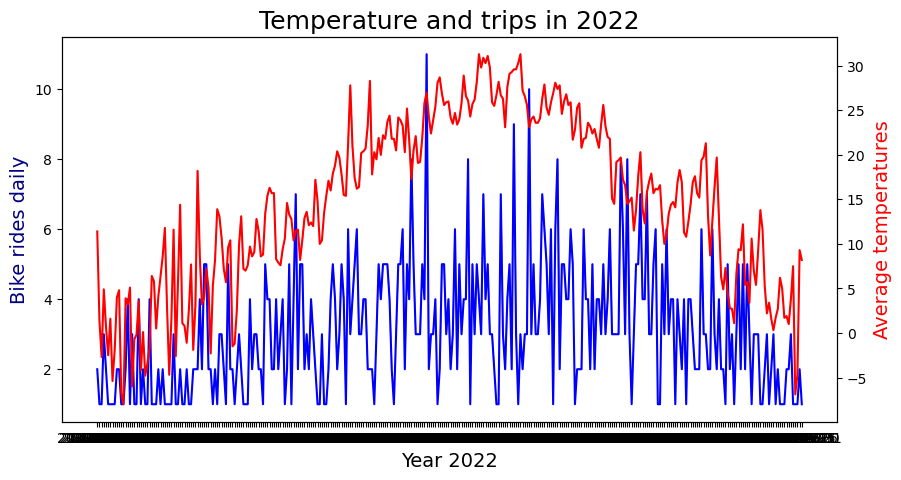

In [14]:
fig,ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = df,x="date",y="bike_rides_daily", color = "b")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily", color = "navy", fontsize = 14) # set y-axis label
ax2 = ax.twinx()
sns.lineplot(data = df,x="date" ,y='avgTemp', color="r", ax=ax2)
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

In [22]:
#plot df
plot_df=df.loc[df["minutes"]<100]

In [21]:
df.quantile(.99,numeric_only=True)

start_station_id    8456.459900
end_station_id      8441.499100
start_lat             40.854914
start_lng            -73.904077
end_lat               40.853671
end_lng              -73.906083
avgTemp               31.100000
bike_rides_daily      11.000000
minutes               81.475333
value                  1.000000
Name: 0.99, dtype: float64

C:\Users\maryp\AppData\Local\Temp\ipykernel_28432\4175011874.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'member_casual', y = 'minutes', data = plot_df, palette = "Blues_r")


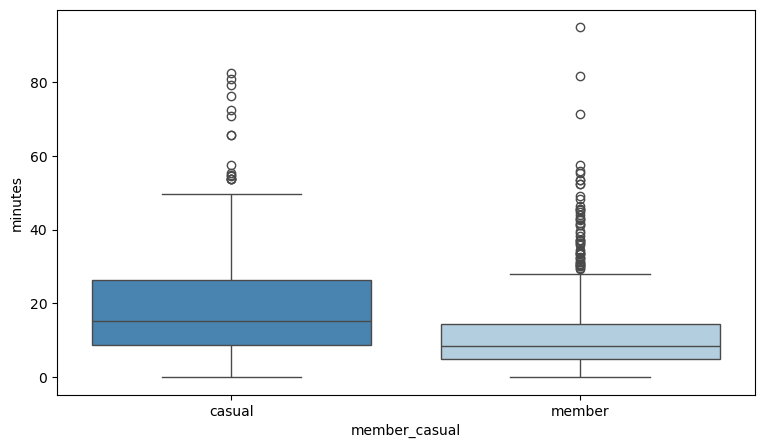

In [23]:
plt.figure(figsize=(9,5))
sns.boxplot(x = 'member_casual', y = 'minutes', data = plot_df, palette = "Blues_r")
plt.show()

C:\Users\maryp\AppData\Local\Temp\ipykernel_28432\1742292816.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y = 'bike_rides_daily', data = df, palette = "Blues_r")


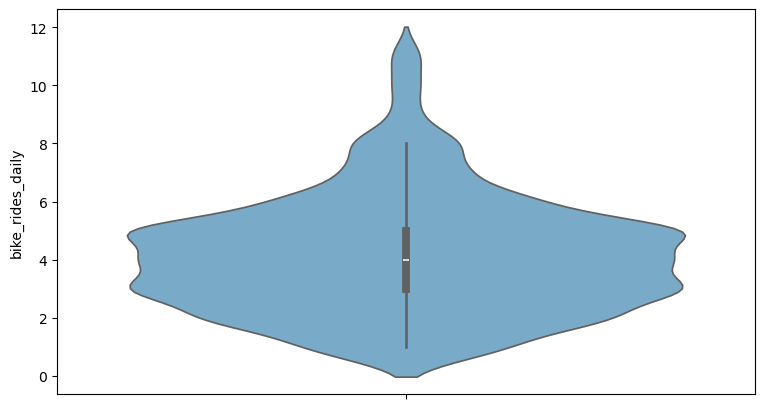

In [16]:
plt.figure(figsize=(9,5))
sns.violinplot(y = 'bike_rides_daily', data = df, palette = "Blues_r")
plt.show()

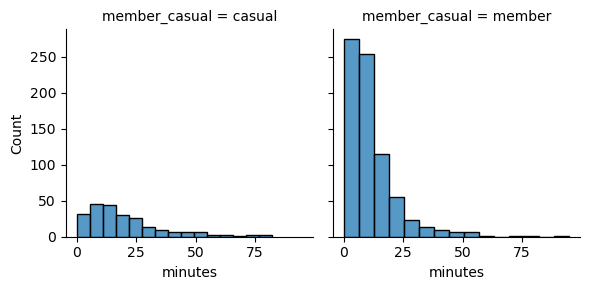

In [25]:
grid = sns.FacetGrid(plot_df, col = "member_casual")
grid.map(sns.histplot, "minutes", bins = 15)

In [ ]:
#the graph shows the distrubution of call lengths for customersboth casual and members. For both groups the majority of rides are less then 25 minutes. 
The members rides last longer then the casual customers.
#A box plot, or box-and-whisker plot, visually represents the distribution of a dataset through its quartiles. The box itself spans from the first quartile (Q1) to the third quartile (Q3), highlighting the interquartile range (IQR), which contains the middle 50% of the data. The line inside the box marks the median of the dataset. The "whiskers" extend from the box to the smallest and largest values within 1.5 times the IQR from Q1 and Q3, respectively, while individual points outside this range are plotted as outliers, providing insights into the data's spread and potential anomalies.